# Atividade 6 - Cálculo Numérico
Carlos Bravo - 119136241

As funções chamadas estão implementadas no arquivo _lib.jl_

O grupo formado foi:
* Carlos Bravo
* Markson Arguello

Algumas questões individuais foram discutidas com:
* Gabriele Jandres
* Markson Arguello

## Imports

In [1]:
include("../lib.jl");

In [2]:
using LinearAlgebra

In [3]:
using Polynomials: Polynomial

In [4]:
using Plots
gr()
theme(:dark)

## Exercício 1

##### Resolve Diagonal

Como sabemos, a multiplicação de uma matriz no formato $(n, n)$ por uma matriz $(n,1)$ tem o  seguinte resultado:

$$
\begin{bmatrix}
    a_{1,1} & a_{1,2} & ... & a_{1,n} \\
    a_{2,1} & a_{2,2} & ... & a_{2,n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{n,1} & a_{n,2} & ... & a_{n,n}
\end{bmatrix}
\cdot
\begin{bmatrix}
    x_{1,1} \\
    x_{2,1} \\
    \vdots \\
    x_{n,1}
\end{bmatrix}
=
\begin{bmatrix}
    y_{1,1} \\
    y_{2,1} \\
    \vdots \\
    y_{n,1}
\end{bmatrix}
$$

Onde, $$y_{i, 1} = a_{i,1} \cdot x_{1, 1} + a_{i,2} \cdot x_{2, 1} + ... + a_{i,n} \cdot x_{n, 1}$$

Com essa generalização e sabendo que uma matriz diagonal possuí números diferentes de 0 apenas em posições $(i,i)$ com $1 \leq i \leq n$, então podemos ignorar todos os elementos que não multiplicam $a_{i,i}$. 

Com isso, a multiplicação de uma matriz diagonal no formato $(n, n)$ por uma matriz $(n,1)$ tem o  seguinte resultado:

$$
\begin{bmatrix}
    a_{1,1} & 0 & ... & 0 \\
    0 & a_{2,2} & ... & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & ... & a_{n,n}
\end{bmatrix}
\cdot
\begin{bmatrix}
    x_{1,1} \\
    x_{2,1} \\
    \vdots \\
    x_{n,1}
\end{bmatrix}
=
\begin{bmatrix}
    y_{1,1} \\
    y_{2,1} \\
    \vdots \\
    y_{n,1}
\end{bmatrix}
$$

Onde, $$y_{i, 1} = a_{i,i} \cdot x_{i, 1}$$

Assim, para resolvermos um sistema $Ax = y$ onde $A$ eh uma matriz diagonal e $y$ é o lado direito da equacao no formato $(n,1)$, a partir da afirmação acima, precisamos que $x$ seja uma matriz no formato $(n,1)$ onde:

$$x_{i, 1} = \frac{y_{i, 1}}{a_{i,i}}$$

Onde $x_{i, 1}$ é o elemento da matriz $x$ na posição $(i, 1)$ com $1 \leq i \leq n$ <br>
$y_{i, 1}$ é o elemento da matriz $y$ na posição $(i, 1)$ com $1 \leq i \leq n$ <br>
$a_{i, i}$ é o elemento da matriz $A$ na posição $(i, i)$ com $1 \leq i \leq n$

In [5]:
#Entrada: Matrizes A, x e y.
#Retorna: Se a matriz x é a solução do sistema linear Ax = y (true) ou não (false)
function testa_matrizes(A, x, y) # Função que verifica se o x é solução de Ax = y
    y_teste = A * x 
    return norm(y_teste - y) < 1e-9
end;    

In [6]:
# Exemplo 1
A_1 = [
    1 0 0;
    0 1 0;
    0 0 1;
]
y_1 = [
    16;
    27;
    15;
]

x_1 = resolve_diagonal(A_1, y_1)

3-element Vector{Float64}:
 16.0
 27.0
 15.0

In [7]:
testa_matrizes(A_1, x_1, y_1) # Teste para verificar se o x encontrado é solução

true

In [8]:
# Exemplo 2
A_2 = [
    152 0 0 0;
    0 320 0 0;
    0 0 95 0;
    0 0 0 13;
]
y_2 = [
    982;
    348;
    572;
    845;
]

x_2 = resolve_diagonal(A_2, y_2)

4-element Vector{Float64}:
  6.4605263157894735
  1.0875
  6.021052631578947
 65.0

In [9]:
testa_matrizes(A_2, x_2, y_2) # Teste para verificar se o x encontrado é solução

true

In [10]:
# Exemplo 3
A_3 = [
    75978 0 0 0 0;
    0 18254 0 0 0;
    0 0 15873 0 0;
    0 0 0 32165 0;
    0 0 0 0 564321
]
y_3 = [
    212654;
    2345816;
    12658;
    2189726;
    135486;
]

x_3 = resolve_diagonal(A_3, y_3)

5-element Vector{Float64}:
   2.798889152122983
 128.50969650487565
   0.7974547974547974
  68.07791077257889
   0.24008675913177074

In [11]:
testa_matrizes(A_3, x_3, y_3) # Teste para verificar se o x encontrado é solução

true

##### Resolve triangular superior

Como visto em aula, dado um sistema com matriz triangular superior precisamos resolve-lá de baixo para cima. Sabemos que no sistema $Ax = y$, com $A$ sendo a matriz triangular superior no formato $(n,n)$ e $y$ sendo uma matriz coluna de tamanho $n$, temos seguinte:

$$
\begin{bmatrix}
    a_{1,1} & a_{1,2} & ... & a_{1,n-1} & a_{1,n} \\
    0 & a_{2,2} & ... & a_{2,n-1} & a_{2,n} \\
    \vdots & \vdots & \ddots & \vdots & \vdots \\
    0 & 0 & ... & a_{n-1,n-1} & a_{n-1,n} \\
    0 & 0 & ... & 0 & a_{n,n}
\end{bmatrix}
\cdot
\begin{bmatrix}
    x_{1,1} \\
    x_{2,1} \\
    \vdots \\
    x_{n-1,1} \\
    x_{n,1}
\end{bmatrix}
=
\begin{bmatrix}
    y_{1,1} \\
    y_{2,1} \\
    \vdots \\
    y_{n-1,1} \\
    y_{n,1}
\end{bmatrix}
$$


Onde,
$$
    y_{i,1} = \sum_{j = i}^{n}(a_{i,j} \cdot x_{j, 1}) = a_{i,i} \cdot x_{i, 1} +  a_{i,i+1} \cdot x_{i+1, 1} + ... +  a_{i,n} \cdot x_{n, 1}
$$

A única equação que podemos resolver é a que tem apenas uma variável. A única linha (equação) que contém apenas uma variável é a última, com isso, sabemos qué:

$$
    x_{n,1} = \frac{y_{n,1}}{a_{n,n}}
$$

Como descobrimos o valor de $x_{n,1}$ podemos utilizar esse valor na linha $n-1$, ficando com:

$$
    x_{n-1,1} = \frac{y_{n-1,1} - a_{n-1, n} \cdot x_{n,1}}{a_{n-1,n-1}} 
$$

E agora, como descobrimos o valor de $x_{n-1,1}$ podemos utilizar esse valor e o de $x_{n,1}$ na linha (equação) $n-2$. O método segue assim até a primeira linha.

In [12]:
# Exemplo 1
A_1 = [
    1 0 0;
    0 1 0;
    0 0 1;
]
y_1 = [
    16;
    27;
    15;
]

x_1 = resolve_triangular_superior(A_1, y_1)

3-element Vector{Float64}:
 16.0
 27.0
 15.0

In [13]:
testa_matrizes(A_1, x_1, y_1) # Teste para verificar se o x encontrado é solução

true

In [14]:
# Exemplo 2
A_2 = [
    12 5 7 14;
    0 9 3 9;
    0 0 19 9;
    0 0 0 3;
]
y_2 = [
    16;
    27;
    15;
    12;
]

x_2 = resolve_triangular_superior(A_2, y_2)

4-element Vector{Float64}:
 -2.425438596491228
 -0.6315789473684208
 -1.105263157894737
  4.0

In [15]:
testa_matrizes(A_2, x_2, y_2) # Teste para verificar se o x encontrado é solução

true

In [16]:
# Exemplo 3
A_3 = [
    75978 535 84 68 9;
    0 18254 24 78 28;
    0 0 15873 15991 2;
    0 0 0 32165 4864;
    0 0 0 0 564321
]
y_3 = [
    2126574;
    23458816;
    125658;
    21849726;
    1354896;
]

x_3 = resolve_triangular_superior(A_3, y_3)

5-element Vector{Float64}:
   19.093774931920727
 1283.1169746761816
 -676.069293110203
  678.9382207288777
    2.4009313847969507

In [17]:
testa_matrizes(A_3, x_3, y_3) # Teste para verificar se o x encontrado é solução

true

##### Resolve triangular inferior

Analogamente, para resolver um sistema com matriz triangular inferior nós precisamos começar de cima e ir resolvendo as equações até a última

In [18]:
# Exemplo 1
A_1 = [
    1 0 0;
    0 1 0;
    0 0 1;
]
y_1 = [
    16;
    27;
    15;
]

x_1 = resolve_triangular_inferior(A_1, y_1)

3-element Vector{Float64}:
 16.0
 27.0
 15.0

In [19]:
testa_matrizes(A_1, x_1, y_1) # Teste para verificar se o x encontrado é solução

true

In [20]:
# Exemplo 2
A_2 = [
    48 0 0 0;
    98 12 0 0;
    54 95 75 0;
    94 37 68 45;
]
y_2 = [
    160;
    277;
    159;
    214;
]

x_2 = resolve_triangular_inferior(A_2, y_2)

4-element Vector{Float64}:
  3.3333333333333335
 -4.13888888888889
  4.962592592592594
 -6.303349794238685

In [21]:
testa_matrizes(A_2, x_2, y_2) # Teste para verificar se o x encontrado é solução

true

In [22]:
# Exemplo 3
A_3 = [
    128 0 0 0 0;
    840 218 0 0 0;
    554 965 705 0 0;
    941 372 678 459 0;
    231 972 543 845 851;
]
y_3 = [
    16410;
    27217;
    15493;
    12514;
    48294;
]

x_3 = resolve_triangular_inferior(A_3, y_3)

5-element Vector{Float64}:
  128.203125
 -369.14506880733944
  426.51554631075544
 -566.4067874234464
  733.8470960420751

In [23]:
testa_matrizes(A_3, x_3, y_3) # Teste para verificar se o x encontrado é solução

true

#### Decomposição LU

Para decompor a matriz $A$ em uma matriz diagonal inferior $L$ e diagonal superior $U$, onde $A=L \cdot U$, utilizamos o algoritmo visto em aula. 
$$
\begin{bmatrix}
    a_{1,1} & a_{1,2} & ... & a_{1,n} \\
    a_{2,1} & a_{2,2} & ... & a_{2,n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{n,1} & a_{n,2} & ... & a_{n,n}
\end{bmatrix}
=
\begin{bmatrix}
    1 & 0 & ... & 0 \\
    l_{2,1} & 1 & ... & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    l_{n,1} & l_{n,2} & ... & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
    u_{1,1} & u_{1,2} & ... & u_{1,n} \\
    0 & u_{2,2} & ... & u_{2,n} \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & ... & u_{n,n}
\end{bmatrix}
$$



Como visto em aula, para encontrarmos a matriz $U$ precisamos escalonar a matriz $A$. Usando a diagonal principal como pivot podemos encontrar coeficientes que quando multiplicados a linha do pivot gerem os elementos na mesma coluna abaixo. Contudo, esses coeficientes são os elementos da matriz $L$, assim, nosso código pode escalonar $A$ para encontrar $U$ e a medida que encontrar os coeficientes, monta a matriz $L$.

In [24]:
# Exemplo 1
A_1 = Float64.([
    1 0 0;
    0 1 0;
    0 0 1;
]);

L_1, U_1 = decomposicao_lu(A_1);

In [25]:
# Para verificarmos a corretude basta multiplicar as matrizes L e U e ver se o resultado é a matriz A
A_teste_1 = L_1 * U_1

3×3 Matrix{Float64}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

In [26]:
norm(A_teste_1 - A_1) < 1e-9 # Teste para saber se as matrizes são aproximadamente iguais

true

In [27]:
# Exemplo 2
A_2 = Float64.([
    98 87 12 38;
    23 84 18 68;
    92 87 23 12;
    48 91 73 15;
]);

L_2, U_2 = decomposicao_lu(A_2);

In [28]:
# Para verificarmos a corretude basta multiplicar as matrizes L e U e ver se o resultado é a matriz A
A_teste_2 = L_2 * U_2

4×4 Matrix{Float64}:
 98.0  87.0  12.0  38.0
 23.0  84.0  18.0  68.0
 92.0  87.0  23.0  12.0
 48.0  91.0  73.0  15.0

In [29]:
norm(A_teste_2 - A_2) < 1e-9 # Teste para saber se as matrizes são aproximadamente iguais

true

In [30]:
# Exemplo 3
A_3 = Float64.([
    4 3 7;
    7 5 9; 
    2 4 6;
]);

L_3, U_3 = decomposicao_lu(A_3);

In [31]:
A_teste_3 = L_3 * U_3

3×3 Matrix{Float64}:
 4.0  3.0  7.0
 7.0  5.0  9.0
 2.0  4.0  6.0

In [32]:
norm(A_teste_3 - A_3) < 1e-9 # Teste para saber se as matrizes são aproximadamente iguais

true

#### Inversa usando LU
Utilizando decomposição LU conseguimos facilmente resolver sistemas do tipo $Ax=b$, onde $A$ é uma matriz $(n,n)$ e $x$ e $b$ são matrizes $(n, 1)$. A ideia é substituir $A=LU$:

$$
\begin{bmatrix}
    a_{1,1} & a_{1,2} & a_{1,3} \\
    a_{2,1} & a_{2,2} & a_{2,3} \\
    a_{3,1} & a_{3,2} & a_{3,3} 
\end{bmatrix}
=
\begin{bmatrix}
    l_{1,1} & 0 & 0 \\
    l_{2,1} & l_{2,2} & 0 \\
    l_{3,1} & l_{3,2} & l_{3,3} 
\end{bmatrix}
\cdot
\begin{bmatrix}
    u_{1,1} & u_{1,2} & u_{1,3} \\
    0 & u_{2,2} & u_{2,3} \\
    0 & 0 & u_{3,3} 
\end{bmatrix}
$$

Logo o sistema $Ax=b$ será $(LU)x=b$:
$$
\begin{bmatrix}
    a_{1,1} & a_{1,2} & a_{1,3} \\
    a_{2,1} & a_{2,2} & a_{2,3} \\
    a_{3,1} & a_{3,2} & a_{3,3} 
\end{bmatrix}
\cdot
\begin{bmatrix}
    x_{1,1} \\
    x_{2,1} \\
    x_{3,1} 
\end{bmatrix}
=
\begin{bmatrix}
    b_{1,1} \\
    b_{2,1} \\
    b_{3,1} 
\end{bmatrix}
$$

$$
\left(
\begin{bmatrix}
    l_{1,1} & 0 & 0 \\
    l_{2,1} & l_{2,2} & 0 \\
    l_{3,1} & l_{3,2} & l_{3,3} 
\end{bmatrix}
\cdot
\begin{bmatrix}
    u_{1,1} & u_{1,2} & u_{1,3} \\
    0 & u_{2,2} & u_{2,3} \\
    0 & 0 & u_{3,3} 
\end{bmatrix}
\right)
\cdot
\begin{bmatrix}
    x_{1,1} \\
    x_{2,1} \\
    x_{3,1} 
\end{bmatrix}
=
\begin{bmatrix}
    b_{1,1} \\
    b_{2,1} \\
    b_{3,1} 
\end{bmatrix}
$$



Se nós mudarmos os parêntesis conseguimos resolver dois sistemas mais simples:

$$
\begin{bmatrix}
    l_{1,1} & 0 & 0 \\
    l_{2,1} & l_{2,2} & 0 \\
    l_{3,1} & l_{3,2} & l_{3,3} 
\end{bmatrix}
\cdot
\left(
\begin{bmatrix}
    u_{1,1} & u_{1,2} & u_{1,3} \\
    0 & u_{2,2} & u_{2,3} \\
    0 & 0 & u_{3,3} 
\end{bmatrix}
\cdot
\begin{bmatrix}
    x_{1,1} \\
    x_{2,1} \\
    x_{3,1} 
\end{bmatrix}
\right)
=
\begin{bmatrix}
    b_{1,1} \\
    b_{2,1} \\
    b_{3,1} 
\end{bmatrix}
$$

Se dissermos que $Ux=d$ teremos dois sistemas do tipo $Ax=b$
$$
\begin{bmatrix}
    u_{1,1} & u_{1,2} & u_{1,3} \\
    0 & u_{2,2} & u_{2,3} \\
    0 & 0 & u_{3,3} 
\end{bmatrix}
\cdot
\begin{bmatrix}
    x_{1,1} \\
    x_{2,1} \\
    x_{3,1} 
\end{bmatrix}
=
\begin{bmatrix}
    d_{1,1} \\
    d_{2,1} \\
    d_{3,1} 
\end{bmatrix}
$$

$$
\begin{bmatrix}
    l_{1,1} & 0 & 0 \\
    l_{2,1} & l_{2,2} & 0 \\
    l_{3,1} & l_{3,2} & l_{3,3} 
\end{bmatrix}
\cdot
\begin{bmatrix}
    d_{1,1} \\
    d_{2,1} \\
    d_{3,1} 
\end{bmatrix}
=
\begin{bmatrix}
    b_{1,1} \\
    b_{2,1} \\
    b_{3,1} 
\end{bmatrix}
$$


Com isso, nós conseguimos achar a inversa de uma matriz $A$ utilizando a decomposição LU pois podemos separar o problema:
$$
\begin{bmatrix}
    a_{1,1} & a_{1,2} & a_{1,3} \\
    a_{2,1} & a_{2,2} & a_{2,3} \\
    a_{3,1} & a_{3,2} & a_{3,3} 
\end{bmatrix}
\cdot
\begin{bmatrix}
    a'_{1,1} & a'_{1,2} & a'_{1,3} \\
    a'_{2,1} & a'_{2,2} & a'_{2,3} \\
    a'_{3,1} & a'_{3,2} & a'_{3,3} 
\end{bmatrix}
=
\begin{bmatrix}
    1 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

nos seguintes problemas:
$$
\begin{bmatrix}
    a_{1,1} & a_{1,2} & a_{1,3} \\
    a_{2,1} & a_{2,2} & a_{2,3} \\
    a_{3,1} & a_{3,2} & a_{3,3} 
\end{bmatrix}
\cdot
\begin{bmatrix}
    a'_{1,1}  \\
    a'_{2,1}  \\
    a'_{3,1} 
\end{bmatrix}
=
\begin{bmatrix}
    1  \\
    0  \\
    0 
\end{bmatrix}\\
$$
$$
\begin{bmatrix}
    a_{1,1} & a_{1,2} & a_{1,3} \\
    a_{2,1} & a_{2,2} & a_{2,3} \\
    a_{3,1} & a_{3,2} & a_{3,3} 
\end{bmatrix}
\cdot
\begin{bmatrix}
    a'_{1,2}  \\
    a'_{2,2}  \\
    a'_{3,2} 
\end{bmatrix}
=
\begin{bmatrix}
    0  \\
    1  \\
    0 
\end{bmatrix}\\
$$
$$
\begin{bmatrix}
    a_{1,1} & a_{1,2} & a_{1,3} \\
    a_{2,1} & a_{2,2} & a_{2,3} \\
    a_{3,1} & a_{3,2} & a_{3,3} 
\end{bmatrix}
\cdot
\begin{bmatrix}
    a'_{1,3}  \\
    a'_{2,3}  \\
    a'_{3,3} 
\end{bmatrix}
=
\begin{bmatrix}
    0  \\
    0  \\
    1 
\end{bmatrix}
$$
onde $A'$ é a inversa de A

E esses problemas podem ser resolvidos facilmente utilizando a decomposição LU

In [33]:
# Caso 1: Identidade
A1 = [
    1 0 0;
    0 1 0;
    0 0 1
]
B1 = inverse_LU(A1)

# Caso 2: Triangular
A2 = [
    1 0 0;
    2 1 0;
    3 4 1
]
B2 = inverse_LU(A2)

# Caso 3: Aleatorio
A3 = randn(5,5)
B3 = inverse_LU(A3)

function check_inverse_norm(A, B)
    n,m = size(A)
    return norm(A*B - Matrix(1.0I, n, m))
end

@assert(check_inverse_norm(A1, B1) < 1e-14)
@assert(check_inverse_norm(A2, B2) < 1e-14)
@assert(check_inverse_norm(A3, B3) < 1e-14)

#### Qual a complexidade?
1. Decomposição LU: $O(n^3)$
0. Criação da matrize inversa $O(n^2)$
0. Resolução dos sistemas $O(n^3)$
    * A resolução de um sistema usando LU é $O(n^2)$, porém, como resolvemos $n$ sistemas então o total será $O(n^3)$
    * A criação do vetor $y$ é $O(n)$, porém, como criamos $n$ vetores então o total será $O(n^2)$
    * Adicionar o vetor como coluna da matriz inversa é $O(n)$, porém, como adicionamos $n$ colunas então o total será $O(n^2)$
    
Então a complexidade total é $O(n^3)$

## Exercício 2

### 2a. Monte o sistema

É possível aproximar uma derivada de duas formas:
$$f'(k) \approx \frac{f(k+h)-f(k)}{h} \approx \frac{f(k)-f(k-h)}{h}$$

$$f'(k) \approx \frac{f(k+h)-f(k-h)}{2h}$$

Podemos aplicar a mesma lógica para a segunda derivada e manipular a aproximação:
$$f''(k) \approx \frac{f'(k+h)-f'(k-h)}{2h}$$

$$f'(k+h) \approx \frac{f(k+h)-f(k)}{h}$$

$$f'(k-h) \approx \frac{f(k)-f(k-h)}{h}$$

$$f''(k) \approx \frac{\frac{f(k+h)-f(k)}{h}-\frac{f(k)-f(k-h)}{h}}{2h} \approx
\frac{f(k+h) - 2f(k) + f(k-h)}{2h^2}$$

Sabemos que a segunda derivada é $4x$ em qualquer ponto, sabemos o valor da função nos pontos $0$ e $10$ e não sabemos a distância entre os pontos, mas sabemos a quantidade de divisões que devem ser feitas. Para calcular a distância precisamos dividir a distância total pela quantidade de divisões. Podemos então fazer o seguinte sistema:
* $f(0) = 5$
* $f(10) = 20$
* $f''(x) = 4x$
* $h = \frac{x_f - x_i}{\text{n_divisoes}} = \frac{10 - 0}{6}$

Assim, obtemos o seguinte sistema:
$$
\begin{bmatrix}
-2 & 1 & 0 & 0 & 0\\
1 & -2 & 1 & 0 & 0\\
0 & 1 & -2 & 1 & 0\\
0 & 0 & 1 & -2 & 1\\
0 & 0 & 0 & 1 & -2
\end{bmatrix}
\begin{bmatrix}
f(x_i+h)\\
f(x_i+2h)\\
f(x_i+3h)\\
f(x_i+4h)\\
f(x_i+5h)
\end{bmatrix}
=
\begin{bmatrix}
f''(x_i+h) * 2 * h^2 - f(x_i)\\
f''(x_i+2h) * 2 * h^2\\
f''(x_i+3h) * 2 * h^2\\
f''(x_i+4h) * 2 * h^2\\
f''(x_i+5h) * 2 * h^2 - f(x_f)
\end{bmatrix}
$$

### 2b. Resolva o sistema

Podemos chamar as funções criadas e passar os parâmetros, assim resolvendo o sistema

In [34]:
n = 7
sd(x) = 4x
yi = 5.0
yf = 20.0
xi = 0.0
xf = 10.0
y_between = finite_difference(n, sd, yi, yf, xi, xf)


h = (xf - xi)/(n-1)

X = xi:h:xf
Y = [yi; y_between; yf]

for i=1:length(Y)
    println("f($(xi + (i-1)*h)) ≈ $(Y[i])")
end

f(0.0) ≈ 5.0
f(1.6666666666666667) ≈ -208.5493827160494
f(3.3333333333333335) ≈ -385.0617283950617
f(5.0) ≈ -487.50000000000006
f(6.666666666666667) ≈ -478.82716049382725
f(8.333333333333334) ≈ -322.0061728395063
f(10.0) ≈ 20.0


Agora que temos os pontos, é possível passar para o próximo passo: interpolar.

### 2c. Interpole y(3.2345)

Sabemos que $y''(x) = 4x$, o que significa que a resposta é a integral realizada duas vezes. Não vamos resolver a EDO agora por métodos tradicionais, mas sabemos que será um polinômio de terceiro grau.

Pela nossa intuição, uma interpolação de grau 3 deve se sair melhor que uma de grau 2, mas a melhor forma de saber é vendo na prática:

In [35]:
P2 = Polynomial(interpolation(X, Y, 2))
P3 = Polynomial(interpolation(X, Y, 3));

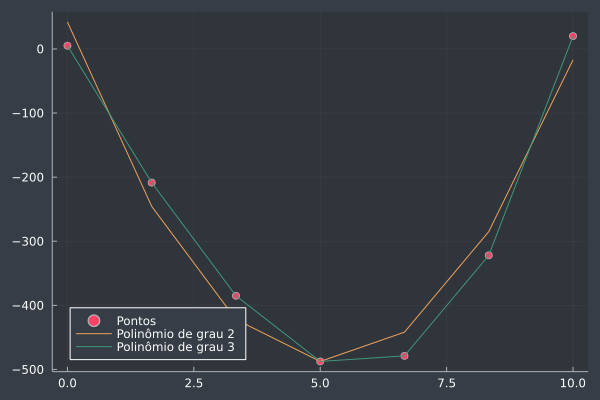

In [36]:
scatter(X, Y, label="Pontos", legend=:bottomleft)
plot!(X, P2.(X), label="Polinômio de grau 2")
plot!(X, P3.(X), label="Polinômio de grau 3")

O gráfico ficou meio reto por estarmos analisando poucos pontos na hora de plotar, mas podemos ver que a curva de grau 3 parece ser bem melhor que a de grau 2. Mas essa é apenas uma análise empírica, vamos calcular o erro máximo de cada curva para termos certeza:

In [37]:
mse(P2.(X), Y)

90.72184232530297

In [38]:
mse(P3.(X), Y)

3.764043137885098e-13

O erro do polinômio de grau 3 foi bem melhor, então vamos usar esse polinômio para encontrar o valor no ponto:

In [39]:
P3(3.2345)

-376.2958400485001

Assim, $y(3.2345) \approx -376.59069822714196$

## Exercício 3

### 3a. Modele como um sistema

Se a temperatura em um nó é a média das pontas temos as seguintes equações:
* $x_1 = \frac{5 + 15 + x_2 + x_3}{4}$
* $x_2 = \frac{15 + 35 + x_1 + x_4}{4}$
* $x_3 = \frac{5 + 10 + x_1 + x_4}{4}$
* $x_4 = \frac{10 + 35 + x_2 + x_3}{4}$

Com isso temos o seguinte sistema:

$$
\begin{bmatrix}
4 & -1 & -1 & 0\\
-1 & 4 & 0 & -1\\
-1 & 0 & 4 & -1\\
0 & -1 & -1 & 4
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
x_4
\end{bmatrix}
=
\begin{bmatrix}
20\\
50\\
15\\
45
\end{bmatrix}
$$

### 3b. Resolva com LU

A resolução de um sistema usando decomposição $LU$ se baseia no fato de termos uma matriz triangular superior e uma inferior. Assim, o sistema $LUx = b$ pode ser resolvido inicial com $LY = b$ resolvendo $Y$ e depois igualando $Ux = Y$, resolvendo o sistema e chegando no valor esperado de $x$

In [40]:
A = Float64.([
    4 -1 -1 0;
    -1 4 0 -1;
    -1 0 4 -1;
    0 -1 -1 4
])

y = [20; 50; 15; 45]

L, U = decomposicao_lu(A)
Y = resolve_triangular_inferior(L, y)
x = resolve_triangular_superior(U, Y)

4-element Vector{Float64}:
 13.125
 20.625
 11.874999999999998
 19.375

Então as temperaturas são:
* $x_1 = 13.125$
* $x_2 = 20.625$
* $x_3 = 11.875$
* $x_4 = 19.375$

### 3c. Discretize ainda mais

Podemos generalizar uma função que calcule a temperatura de um lago de tamanho $(n,n)$

In [41]:
n = 5
tempN = 20
tempW = 25
tempS = 30
tempE = 20
lake_degree(n, tempN, tempW, tempS, tempE)

25-element Vector{Float64}:
 22.656565656565654
 21.76228632478632
 21.286519036519035
 20.89359945609946
 20.46969696969697
 23.863976301476303
 23.106060606060602
 22.49019036519036
 21.818181818181817
 20.98518842268842
 24.69327894327894
 24.30778943278943
 23.75
 22.90374902874903
 21.652874902874903
 25.60135003885004
 25.68181818181818
 25.29827117327117
 24.393939393939394
 22.722562160062164
 27.03030303030303
 27.519862082362085
 27.367327117327115
 26.651175213675213
 24.843434343434346

### 3d. Maior n em 2 minutos

Poderíamos testar com vários tamanhos de lago e ir calculando o tempo, mas podemos fazer de uma forma mais inteligente. Para resolver o problema usamos a função criada $\text{lake_degree}$, vamos então fazer uma análise de complexidade:
1. Criação da matriz: $O(n^4)$
    * Como criamos uma matriz de lado $n^2$, a complexidade de criação é $O(n^4)$
    * Ao preencher é feito um for para cada linha que modificada apenas 5 elementos, então a complexidade de preenchimento é $O(n^2)$
0. Criação do vetor: $O(n^2)$
    * Um vetor de $n^2$ elementos possui complexidade $O(n^2)$ para ser criado
    * Cada preenchimento lateral é um for que percorre $n$ elementos, então sua complexidade é $O(n)$
0. Resolução do sistema: $O(n^6)$
    * Para fazer a decomposição LU a complexidade é $O(n^3)$, mas como a matriz possui lado $n^2$ a complexidade é $O(n^6)$
    * Para resolver os sistemas triangulares será $O(n^2)$, mas com lado $n^2$ fica $O(n^4)$
    
Vamos aproximar que um computador consegue rodar $10^8$ operações em 1 segundo, então para 2 minutos precisaremos de $120 * 10^8 = 1.2*10^{10}$ operações.

In [42]:
(1.2e10)^(1.0/6)

47.84797263319171

Então é necessário um lago com tamanho de aproximadamente 47 pontos para que leve 2 minutos. Não conseguimos facilmente uma busca binária pois a princípio poderíamos ter infinitos pontos, impossibilitando um máximo. Então vamos começar nossa análise com 47 pontos e ir percorrendo linearmente mesmo. 

Para facilitar as contas, vamos considerar cada lado começando com temperatura da maior potência de $4$, pois assim poderão ser feitas várias divisões por 4 sem dar problemas com pontos flutuantes. O tamanho máximo de um inteiro é $2^{63}-1$, então vamos considerar o maior inteiro múltiplo de 4 em $4^{31}$.

In [50]:
function find_lake_size(initial_guess, max_time)
    # Maior multiplo de 4 em cada temperatura
    tempN = 4e31
    tempW = 4e31
    tempS = 4e31
    tempE = 4e31
    
    # Dado um n, retorna o tempo que levou para executar
    lake_time(n) = @elapsed lake_degree(n, tempN, tempW, tempS, tempE)
    
    n = initial_guess
    time = 2^63 - 1 # Comeca o tempo com "infinito"
    while(true)
        print("Rodando com tamanho $n: ")
        last_time = time
        time = lake_time(n)
        println("Levou $time segundos")

        if(time > max_time)
            # Se passou do maximo tem que voltar
            n -= 1
            # Mas se o anterior for menor, eh porque encontrou a fronteira
            if(last_time < time) return n end
        else
            # Senao tem que avancar
            n += 1
        end
    end
end

find_lake_size(47, 2*60)

Rodando com tamanho 47: Levou 119.410526769 segundos
Rodando com tamanho 48: Levou 203.335448605 segundos


47

E para o bem de todos e felicidade geral da nação, 47 é a resposta certa! Não precisamos rodar com tantos números para descobrir. Mas o que encontramos é que o tamanho do lago é 47, enquanto a questão pede a quantidade de nós. A quantidade de nós do lago é simplesmente o lado ao quadrado, então:

In [44]:
println("O lago possui $(47^2) nós")

O lago possui 2209 nós


## Exercício 4

Antes de começar a questão, vamos criar o sistema. Sabemos que o fluxo de entrada de um nó deve ser igual ao de saída, então:
<ol style="list-style-type: upper-alpha;">
  <li>$x_1 = 2000 + 5000$</li>
  <li>$x_2 = 1500 + 2000$</li>
  <li>$x_3 = 8000 + 1000$</li>
  <li>$x_4 = x_1 + 30000 [+ x_9]$</li>
  <li>$x_5 = x_3 + 3000$</li>
  <li>$x_6 = x_4 + x_2$</li>
  <li>$x_7 = x_5 + 3000$</li>
  <li>$x_8 = x_6 + 500 + x+7$</li>
</ol>

Com isso podemos montar o seguinte sistema (Sem contar $x_9$):

$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
-1 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & -1 & 0 & 1 & 0 & 0 & 0\\
0 & -1 & 0 & -1 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & -1 & 0 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & -1 & -1 & 1\\
\end{bmatrix}
\begin{bmatrix}
x_1\\
x_2\\
x_3\\
x_4\\
x_5\\
x_6\\
x_7\\
x_8\\
\end{bmatrix}
=
\begin{bmatrix}
7000\\
3500\\
9000\\
30000\\
3000\\
0\\
3000\\
500\\
\end{bmatrix}
$$

### 4a. Resolva sem $x_9$

Sabendo o sistema, vamos montar e resolver:

In [45]:
A = [
    1 0 0 0 0 0 0 0;
    0 1 0 0 0 0 0 0;
    0 0 1 0 0 0 0 0;
    -1 0 0 1 0 0 0 0;
    0 0 -1 0 1 0 0 0;
    0 -1 0 -1 0 1 0 0;
    0 0 0 0 -1 0 1 0;
    0 0 0 0 0 -1 -1 1
]

y = [7000; 3500; 9000; 30000; 3000; 0; 3000; 500]
;

Podemos resolver da mesma forma que foi feito na questão 3

In [46]:
L, U = decomposicao_lu(A)
Y = resolve_triangular_inferior(L, y)
x = resolve_triangular_superior(U, Y)

8-element Vector{Float64}:
  7000.0
  3500.0
  9000.0
 37000.0
 12000.0
 40500.0
 15000.0
 56000.0

### 4b. Resolva com $x_9$

Ao adicionar $x_9$ teremos uma coluna e uma variável a mais

In [47]:
A = [
    1 0 0 0 0 0 0 0 0;
    0 1 0 0 0 0 0 0 0;
    0 0 1 0 0 0 0 0 0;
    -1 0 0 1 0 0 0 0 -1;
    0 0 -1 0 1 0 0 0 1;
    0 -1 0 -1 0 1 0 0 0;
    0 0 0 0 -1 0 1 0 0;
    0 0 0 0 0 -1 -1 1 0
]
;

In [48]:
L, U = decomposicao_lu(A)
Y = resolve_triangular_inferior(L, y)
x = resolve_triangular_superior(U, Y)

8-element Vector{Float64}:
  7000.0
  3500.0
  9000.0
 37000.0
 12000.0
 40500.0
 15000.0
 56000.0

A resposta é a mesma que se o cano $x_9$ não existisse, e isso faz sentido pela definição da decomposição $LU$. A decomposição apenas dá certo se a matriz $A$ for quadrada, mas não é o que acontece. Como temos 8 equações e 9 variáveis, temos uma matriz $(8,9)$. 

Da forma como a função foi feita, irá registrar o primeiro número $(8)$ como o tamanho da matriz e tratar como uma matriz quadrada. A coluna extra então passará despercebida. No entanto, se tivéssemos adicionado mais um bairro, teríamos uma matriz $(9,8)$ e, pela definição do código, iríamos tratar como uma matriz quadrada de tamanho $9$ e acessar posições inválidas da matriz, impedindo sua execução.